![](https://www.dii.uchile.cl/wp-content/uploads/2021/06/Magi%CC%81ster-en-Ciencia-de-Datos.png)

# Proyecto: Riesgo en el Banco Giturra

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

### Cuerpo Docente:

- Profesor: Pablo Badilla, Ignacio Meza De La Jara
- Auxiliar: Sebastián Tinoco
- Ayudante: Diego Cortez M., Felipe Arias T.

_Por favor, lean detalladamente las instrucciones de la tarea antes de empezar a escribir._

### Integrantes:

- Nombre de alumno 1: Benjamín Hernth
- Nombre de alumno 2: Antonia Villegas

Link de repositorio de GitHub: https://github.com/morbul/MDS7202_entregas

## Reglas

- Fecha de entrega: 01/06/2021
- **Grupos de 2 personas.**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Estrictamente prohibida la copia.
- Pueden usar cualquier material del curso que estimen conveniente.



###***Instalación de Librerías y Carga de Datos***###


In [1]:
import joblib
#import lightgbm
import numpy
import pandas
import dateutil
#import pytz
import sklearn
import scipy
import six
import threadpoolctl
#import tzdata
#import xgboost


In [2]:
#pip uninstall lightgbm
!pip install lightgbm==4.0.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 24.2 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 3.3.5
    Uninstalling lightgbm-3.3.5:
      Successfully uninstalled lightgbm-3.3.5


In [3]:
!pip install pytz==2023.3


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.3/502.3 kB 10.6 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.7.1
    Uninstalling pytz-2022.7.1:
      Successfully uninstalled pytz-2022.7.1


In [4]:
!pip install tzdata==2023.3


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 8.8 MB/s eta 0:00:00


In [5]:
!pip install xgboost==1.7.6


###***1. Introducción [0.5 puntos]***###

**Antecedentes**

*   Desarrollar un modelo predictivo de riesgo crediticio que prediga si un cliente es propenso a no cumplir con los pagos.
*   Los modelos solicitados por el banquero deben ser interpretables.
*   Hay que crear un modelo de riesgo disponibilizando a la contraparte una amplia gama de variables de sus clientes: como historiales de crédito, ingresos y otros factores financieros relevantes, para evaluar la probabilidad de incumplimiento de pago de los usuarios.

**Datos de entrada**

Se nos entrega un dataset con las características de los clientes del banco.



**Métrica de evaluación**

Considerando que los datos presentan desbalanceo y que el uso de la métrica 'accuracy' sería incorrecto, decidimos usar precision, recall y F1 con mayor énfasis en esta última dado que combina tanto precisicon como recall.

**Modelo usasdo**

Primero se preprocesaron los datos para dejarlos limpios, luego se hizo una conversión de columnas mal leídas para luego aplicar la técnica del ColumnTransformer (luego de definir variables y dividir conjunto) tratando los datos categóricos y numéricos con StandardScaler y OneHotEncoder respectivamente.

En el siguiente paso se entrenaron varios modelos de clasificación (Random Forest, Dummy Classifier, Logistic Regression, K Nearest Neighbors, Decision Tree, Support Vector Machine, LightGBM y XGBoosting), realizado predicciones en el conjunto de prueba y mostrando los resultados de evaluación para cada modelo utilizando métricas de clasificación estándar.

Como tercer paso se hico un dataframe con las metrícas ordenadas de cada modelo de forma descendente dado el valor de F1-score para luego elegir las 2 más competentes. Con los 2 modelos seleccionados se buscaron los mejores hiperparámetros utilizando GridSearchCV y HalvingGridSearchCV, y luego se evaluó el rendimiento de cada modelo con los mejores hiperparámetros utilizando las métricas declaradas en el comienzo. A partir de esta última evaluación se elige un modelo ganador para proseguir a estudiar sus features más importantes usando distintas herramientas.

**¿Resolvimos el problema?**

El problema fue resuelto, se encontro un modelo mejor que el baseline para poder predecir correctamente los potenciales clientes de interes, pero no obtuvimos resultados aceptables, metricas de recall de 0.53 para la clase de interes no son suficientes para decir que nuestro modelo cumple con lo pedido al comporar con otros equipos. Una metrica aceptable se obtuvo con modelos 'Unbalanced' pero esto no fue estudiado en profundidad, se deja como posible mejora a un resultado satisfactorio.

###***2. Carga de datos Análisis Exploratorio de Datos [Sin puntaje]***###

In [6]:
import pyarrow.parquet as pq

# Ruta y nombre del archivo
archivo_pq = 'dataset.pq'

# Cargar el archivo Parquet en un dataframe
data = pq.read_table(archivo_pq).to_pandas()
data

,customer_id,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,4.0,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,0
1,CUS_0x21b1,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,3,...,2.0,605.03,32.933856,27.0,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,0
2,CUS_0x2dbc,34.0,Engineer,143162.64,12187.220000,1,5,8,3.0,8,...,3.0,1303.01,38.374753,18.0,No,246.992319,10000.000000,High_spent_Small_value_payments,895.494583,0
3,CUS_0xb891,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,-100.0,4,...,4.0,632.46,27.332515,17.0,No,16.415452,125.617251,High_spent_Small_value_payments,379.216381,0
4,CUS_0x1cdb,21.0,Developer,35547.71,2853.309167,7,5,5,-100.0,1,...,4.0,943.86,25.862922,31.0,Yes,0.000000,181.330901,High_spent_Small_value_payments,364.000016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,CUS_0x372c,19.0,Lawyer,42903.79,3468.315833,0,4,6,1.0,9,...,1.0,1079.48,35.716618,28.0,No,34.975457,115.184984,High_spent_Medium_value_payments,NaN,0
12496,CUS_0xf16,45.0,Media_Manager,16680.35,NaN,1,1,5,4.0,1,...,8.0,897.16,41.212367,NaN,No,41.113561,70.805550,Low_spent_Large_value_payments,NaN,0
12497,CUS_0xaf61,50.0,Writer,37188.10,3097.008333,1,4,5,3.0,7,...,3.0,620.64,39.300980,30.0,No,84.205949,42.935566,High_spent_Medium_value_payments,NaN,0
12498,CUS_0x8600,29.0,Architect,20002.88,1929.906667,10,8,29,5.0,33,...,9.0,3571.70,37.140784,6.0,Yes,60.964772,34.662906,High_spent_Large_value_payments,NaN,0


Vemos que en un principio hay 12500 observaciones y 22 variables que describen a un cliente. A continuación veremos más detalles de las variables.

In [7]:
print(data.info())
#data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               12500 non-null  object 
 1   age                       12500 non-null  float64
 2   occupation                12500 non-null  object 
 3   annual_income             12500 non-null  float64
 4   monthly_inhand_salary     10584 non-null  float64
 5   num_bank_accounts         12500 non-null  int64  
 6   num_credit_card           12500 non-null  int64  
 7   interest_rate             12500 non-null  int64  
 8   num_of_loan               12500 non-null  float64
 9   delay_from_due_date       12500 non-null  int64  
 10  num_of_delayed_payment    11660 non-null  float64
 11  changed_credit_limit      12246 non-null  float64
 12  num_credit_inquiries      12243 non-null  float64
 13  outstanding_debt          12500 non-null  float64
 14  credit

Describimos qué es cada característica:

1) customer_id: Identificación del cliente (objeto).

2) age: Edad del cliente (float).

3) occupation: Ocupación del cliente (objeto).

4) annual_income: Ingreso anual del cliente (float).

5) monthly_inhand_salary: Salario mensual disponible del cliente (flotante).

6) num_bank_accounts: Número de cuentas bancarias del cliente (entero).

7) num_credit_card: Número de tarjetas de crédito del cliente (entero).

8) interest_rate: Tasa de interés (entero).

9) num_of_loan: Número de préstamos del cliente (float).

10) delay_from_due_date: Retraso desde la fecha de vencimiento (entero).

11) num_of_delayed_payment: Número de pagos atrasados (float).

12) changed_credit_limit: Límite de crédito cambiado (float).

13) num_credit_inquiries: Número de consultas de crédito (flotante).

14) outstanding_debt: Deuda pendiente (float).

15) credit_utilization_ratio: Relación de utilización de crédito (float).

16) credit_history_age: Antigüedad del historial de crédito (float).

17) payment_of_min_amount: Pago del monto mínimo (objeto).

18) total_emi_per_month: Total de cuotas mensuales (float).

19) amount_invested_monthly: Cantidad invertida mensualmente (float).

20) payment_behaviour: Comportamiento de pago (objeto).

21) monthly_balance: Saldo mensual (float).

22) credit_score: Puntaje de crédito (binario).

Necesitamos ver si hay valores nulos:

In [8]:
data.isna().sum()

customer_id                    0
age                            0
occupation                     0
annual_income                  0
monthly_inhand_salary       1916
num_bank_accounts              0
num_credit_card                0
interest_rate                  0
num_of_loan                    0
delay_from_due_date            0
num_of_delayed_payment       840
changed_credit_limit         254
num_credit_inquiries         257
outstanding_debt               0
credit_utilization_ratio       0
credit_history_age          1120
payment_of_min_amount          0
total_emi_per_month            0
amount_invested_monthly      586
payment_behaviour              0
monthly_balance              355
credit_score                   0
dtype: int64

Las variables monthly_inhand_salary, num_of_delayed_payment, changed_credit_limit, num_credit_inquiries, credit_history_age, amount_invested_monthly, monthly_balance tienen algunos valores nulos.

Vemos si hay valores duplicados:

In [9]:
duplicates = data.duplicated(subset=['customer_id'])
n_duplicated = duplicates.sum()
print(f"Existen {n_duplicated} filas con identificadores duplicados.")

Existen 0 filas con identificadores duplicados.


Eliminamos filas que tengan algún valor nulo:

In [10]:
# Limpiar nans
df_customers = data.dropna()

In [11]:
# Verificar Nan
df_customers.isna().sum()

customer_id                 0
age                         0
occupation                  0
annual_income               0
monthly_inhand_salary       0
num_bank_accounts           0
num_credit_card             0
interest_rate               0
num_of_loan                 0
delay_from_due_date         0
num_of_delayed_payment      0
changed_credit_limit        0
num_credit_inquiries        0
outstanding_debt            0
credit_utilization_ratio    0
credit_history_age          0
payment_of_min_amount       0
total_emi_per_month         0
amount_invested_monthly     0
payment_behaviour           0
monthly_balance             0
credit_score                0
dtype: int64

In [12]:
df_customers

,customer_id,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
1,CUS_0x21b1,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,3,...,2.0,605.03,32.933856,27.0,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,0
2,CUS_0x2dbc,34.0,Engineer,143162.64,12187.220000,1,5,8,3.0,8,...,3.0,1303.01,38.374753,18.0,No,246.992319,10000.000000,High_spent_Small_value_payments,895.494583,0
3,CUS_0xb891,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,-100.0,4,...,4.0,632.46,27.332515,17.0,No,16.415452,125.617251,High_spent_Small_value_payments,379.216381,0
4,CUS_0x1cdb,21.0,Developer,35547.71,2853.309167,7,5,5,-100.0,1,...,4.0,943.86,25.862922,31.0,Yes,0.000000,181.330901,High_spent_Small_value_payments,364.000016,0
6,CUS_0x284a,34.0,Lawyer,131313.40,10469.207759,0,1,8,2.0,0,...,4.0,352.16,29.187913,31.0,No,911.220179,870.522382,Low_spent_Medium_value_payments,396.111346,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12282,CUS_0x7dc5,32.0,Architect,175572.44,14422.036667,5,4,1,3.0,10,...,1.0,388.99,43.306156,32.0,No,290.106973,97.860362,High_spent_Large_value_payments,1294.236331,0
12283,CUS_0xa568,40.0,Scientist,120009.32,10242.776667,5,1,7,4.0,14,...,0.0,446.51,36.839608,29.0,No,230.528352,197.626771,High_spent_Large_value_payments,836.122544,0
12284,CUS_0x701f,24.0,Lawyer,59868.93,5111.077500,4,7,9,4.0,8,...,4.0,417.72,24.803887,29.0,No,104.622038,10000.000000,Low_spent_Small_value_payments,80.190256,0
12286,CUS_0xa407,29.0,Entrepreneur,34599.94,2942.328333,7,6,3,0.0,22,...,1.0,942.59,33.128609,27.0,No,0.000000,165.397552,High_spent_Small_value_payments,388.835282,0


Ahora quedan 7986 observaciones

 Nos aseguramos de que todos los valores sean numéricos, tratando los valores no numéricos como NaN y estableciendo los valores negativos a 0:

In [13]:
import pandas as pd
# Convert 'num_of_loan' column to numeric type (in case it's not already)
df_customers['num_of_loan'] = pd.to_numeric(df_customers['num_of_loan'], errors='coerce')

# Set negative values in 'num_of_loan' column to 0
df_customers.loc[df_customers['num_of_loan'] < 0, 'num_of_loan'] = 0
df_customers['num_of_loan'] = df_customers['num_of_loan'].astype(float)

<ipython-input-13-c0f1223d5332>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers['num_of_loan'] = pd.to_numeric(df_customers['num_of_loan'], errors='coerce')
<ipython-input-13-c0f1223d5332>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers['num_of_loan'] = df_customers['num_of_loan'].astype(float)


Segmentamos por edad:

In [14]:
def categorize_by_age(age):
  ranges = {
    'Joven': (0, 17),
    'Adulto-Joven': (18, 26),
    'Adulto': (27, 59),
    'Persona Mayor': (60, 120)
    }
  for range in ranges:
    pair = ranges[range]
    lower = pair[0]
    upper = pair[1]
    if age>=lower and age<=upper:
      return range

  # Si por alguna razón nos pasamos, aquí hay algo raro
  return 'No válida'

In [15]:
df_customers['segmentacion_etaria'] = df_customers['age'].apply(categorize_by_age)

<ipython-input-15-3279f620cb2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers['segmentacion_etaria'] = df_customers['age'].apply(categorize_by_age)


In [16]:
print(f"Rangos creados: {df_customers['segmentacion_etaria'].unique()}")
df_customers[['segmentacion_etaria','age']]

Rangos creados: ['Adulto' 'Adulto-Joven' 'Joven' 'No válida']


,segmentacion_etaria,age
1,Adulto,28.0
2,Adulto,34.0
3,Adulto,55.0
4,Adulto-Joven,21.0
6,Adulto,34.0
...,...,...
12282,Adulto,32.0
12283,Adulto,40.0
12284,Adulto-Joven,24.0
12286,Adulto,29.0


df_customers queda como:

In [17]:
df_customers

,customer_id,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score,segmentacion_etaria
1,CUS_0x21b1,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,3,...,605.03,32.933856,27.0,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,0,Adulto
2,CUS_0x2dbc,34.0,Engineer,143162.64,12187.220000,1,5,8,3.0,8,...,1303.01,38.374753,18.0,No,246.992319,10000.000000,High_spent_Small_value_payments,895.494583,0,Adulto
3,CUS_0xb891,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,0.0,4,...,632.46,27.332515,17.0,No,16.415452,125.617251,High_spent_Small_value_payments,379.216381,0,Adulto
4,CUS_0x1cdb,21.0,Developer,35547.71,2853.309167,7,5,5,0.0,1,...,943.86,25.862922,31.0,Yes,0.000000,181.330901,High_spent_Small_value_payments,364.000016,0,Adulto-Joven
6,CUS_0x284a,34.0,Lawyer,131313.40,10469.207759,0,1,8,2.0,0,...,352.16,29.187913,31.0,No,911.220179,870.522382,Low_spent_Medium_value_payments,396.111346,0,Adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12282,CUS_0x7dc5,32.0,Architect,175572.44,14422.036667,5,4,1,3.0,10,...,388.99,43.306156,32.0,No,290.106973,97.860362,High_spent_Large_value_payments,1294.236331,0,Adulto
12283,CUS_0xa568,40.0,Scientist,120009.32,10242.776667,5,1,7,4.0,14,...,446.51,36.839608,29.0,No,230.528352,197.626771,High_spent_Large_value_payments,836.122544,0,Adulto
12284,CUS_0x701f,24.0,Lawyer,59868.93,5111.077500,4,7,9,4.0,8,...,417.72,24.803887,29.0,No,104.622038,10000.000000,Low_spent_Small_value_payments,80.190256,0,Adulto-Joven
12286,CUS_0xa407,29.0,Entrepreneur,34599.94,2942.328333,7,6,3,0.0,22,...,942.59,33.128609,27.0,No,0.000000,165.397552,High_spent_Small_value_payments,388.835282,0,Adulto


De df_customers sacamos a customer_id:



In [18]:
# Eliminar la columna 'customer_id' del DataFrame df_customers
df_customers.drop('customer_id', axis=1, inplace=True)

<ipython-input-18-7fa077c1854e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers.drop('customer_id', axis=1, inplace=True)


###***3. Preparación de Datos [0.5 puntos] y 4. Baseline [1.5 puntos]***###



**Datos nulos:** Dado que contamos con una gran cantidad de observaciones y que las observaciones con valores faltantes pueden afectar negativamente la calidad del modelo si llegan a estar relacionados con la variable objetivo y su presencia o ausencia puede sesgar el modelo, por lo que es preferible eliminarlos para evitar resultados sesgados o poco precisos


Vemos cuáles columnas son categóricas:

In [19]:
df_customers.select_dtypes(include="object").columns

Index(['occupation', 'payment_of_min_amount', 'payment_behaviour',
       'segmentacion_etaria'],
      dtype='object')

In [20]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Paso 1: Convertir las columnas mal leídas a sus tipos correspondientes
df_customers['monthly_inhand_salary'] = df_customers['monthly_inhand_salary'].astype(float)
df_customers['num_of_delayed_payment'] = df_customers['num_of_delayed_payment'].astype(float)
df_customers['changed_credit_limit'] = df_customers['changed_credit_limit'].astype(float)
df_customers['num_credit_inquiries'] = df_customers['num_credit_inquiries'].astype(float)
df_customers['credit_history_age'] = df_customers['credit_history_age'].astype(float)
df_customers['total_emi_per_month'] = df_customers['total_emi_per_month'].astype(float)
df_customers['amount_invested_monthly'] = df_customers['amount_invested_monthly'].astype(float)
df_customers['monthly_balance'] = df_customers['monthly_balance'].astype(float)

# Definir las variables predictoras (X) y la variable objetivo (y)
X = df_customers.drop('credit_score', axis=1)  # Variables predictoras
y = df_customers['credit_score']  # Variable objetivo

# Supongamos que df_customers contiene todas las columnas, incluidas las numéricas y categóricas
categoricas = ['occupation', 'payment_of_min_amount','segmentacion_etaria','payment_behaviour']
numericas = df_customers.select_dtypes(include=['float64', 'int64']).columns.tolist()
numericas.remove('credit_score')

# Crear el ColumnTransformer con la opción set_output(transform="pandas")
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numericas),  # Preprocesamiento para columnas numéricas
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), categoricas)
    ], remainder="passthrough",
    verbose_feature_names_out=False  # Evitar que el ColumnTransformer agregue prefijos a las columnas
)
preprocessor.set_output(transform="pandas")  # Establecer el formato de salida a pandas DataFrame

# Dividir el conjunto de datos en conjunto de entrenamiento (80%) y conjunto de prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



<ipython-input-20-31c880002a64>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers['monthly_inhand_salary'] = df_customers['monthly_inhand_salary'].astype(float)
<ipython-input-20-31c880002a64>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers['num_of_delayed_payment'] = df_customers['num_of_delayed_payment'].astype(float)
<ipython-input-20-31c880002a64>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Crear y entrenar el modelo Random Forest con estrategia estratificada
model_rf = RandomForestClassifier(random_state=42)
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model_rf)])
pipeline_rf.fit(X_train, y_train)

# Crear y entrenar el modelo Dummy con estrategia estratificada
model_dummy = DummyClassifier(strategy='stratified', random_state=42)
pipeline_dummy = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model_dummy)])
pipeline_dummy.fit(X_train, y_train)

# Crear y entrenar el modelo Logistic Regression
model_lr = LogisticRegression(random_state=42)
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model_lr)])
pipeline_lr.fit(X_train, y_train)

# Crear y entrenar el modelo K Nearest Neighbors
model_knn = KNeighborsClassifier()
pipeline_knn = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model_knn)])
pipeline_knn.fit(X_train, y_train)

# Crear y entrenar el modelo Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)
pipeline_dt = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model_dt)])
pipeline_dt.fit(X_train, y_train)

# Crear y entrenar el modelo Support Vector Machine
model_svc = SVC(random_state=42)
pipeline_svc = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model_svc)])
pipeline_svc.fit(X_train, y_train)

# Crear y entrenar el modelo Random Forest
model_rf = RandomForestClassifier(random_state=42)
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model_rf)])
pipeline_rf.fit(X_train, y_train)

# Crear y entrenar el modelo LightGBM
model_lgbm = LGBMClassifier(random_state=42)
pipeline_lgbm = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model_lgbm)])
pipeline_lgbm.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba para cada modelo
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_dummy = pipeline_dummy.predict(X_test)
y_pred_lr = pipeline_lr.predict(X_test)
y_pred_knn = pipeline_knn.predict(X_test)
y_pred_dt = pipeline_dt.predict(X_test)
y_pred_svc = pipeline_svc.predict(X_test)
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_lgbm = pipeline_lgbm.predict(X_test)

# Imprimir los resultados de precision, recall y f1-score para cada modelo utilizando classification_report
print("Metrics for Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("Metrics for Dummy Classifier:")
print(classification_report(y_test, y_pred_dummy))

print("\nMetrics for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

print("\nMetrics for K Nearest Neighbors:")
print(classification_report(y_test, y_pred_knn))

print("\nMetrics for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

print("\nMetrics for Support Vector Machine:")
print(classification_report(y_test, y_pred_svc))

print("\nMetrics for Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("\nMetrics for LightGBM:")
print(classification_report(y_test, y_pred_lgbm))



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1822, number of negative: 4566
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000808 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2344
[LightGBM] [Info] Number of data points in the train set: 6388, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.285222 -> initscore=-0.918703
[LightGBM] [Info] Start training from score -0.918703
Metrics for Random Forest:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1112
           1       0.69      0.48      0.56       486

    accuracy                           0.77      1598
   macro avg       0.74      0.69      0.71      1598
weighted avg       0.76      0.77      0.76      1598

Metrics for Dummy Classifier:
              precision    recall  f1-scor

Modelo XGBoost

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Convertir las etiquetas de la variable objetivo a valores numéricos enteros
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Crear el modelo XGBoost
model_xgb = XGBClassifier(random_state=42)

# Crear la pipeline que incluye el preprocesador y el clasificador
pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model_xgb)])

# Entrenar el modelo utilizando los datos de entrenamiento
pipeline_xgb.fit(X_train, y_train_encoded)

# Realizar predicciones en el conjunto de prueba
y_pred_xgb_encoded = pipeline_xgb.predict(X_test)

# Convertir las etiquetas predichas a etiquetas originales (cadenas)
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb_encoded)

print("\nMetrics for XGBoost:")
print(classification_report(y_test, y_pred_xgb))



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



Metrics for XGBoost:
              precision    recall  f1-score   support

           0       0.80      0.89      0.85      1112
           1       0.68      0.50      0.57       486

    accuracy                           0.77      1598
   macro avg       0.74      0.70      0.71      1598
weighted avg       0.76      0.77      0.76      1598



Calculamos las métricas de precisión, recall y F1-score (weighted) para modelo:

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Realizar predicciones en el conjunto de prueba para el modelo Random Forest
y_pred_rf = pipeline_rf.predict(X_test)

# Calcular las métricas para el modelo Random Forest
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')



# Realizar predicciones en el conjunto de prueba para el modelo Dummy Classifier
y_pred_dummy = pipeline_dummy.predict(X_test)

# Calcular las métricas para el modelo Dummy Classifier
precision_dummy = precision_score(y_test, y_pred_dummy, average='weighted')
recall_dummy = recall_score(y_test, y_pred_dummy, average='weighted')
f1_dummy = f1_score(y_test, y_pred_dummy, average='weighted')

# Realizar predicciones en el conjunto de prueba para el modelo Logistic Regression
y_pred_lr = pipeline_lr.predict(X_test)

# Calcular las métricas para el modelo Logistic Regression
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

# Realizar predicciones en el conjunto de prueba para el modelo K Nearest Neighbors
y_pred_knn = pipeline_knn.predict(X_test)

# Calcular las métricas para el modelo K Nearest Neighbors
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# Realizar predicciones en el conjunto de prueba para el modelo Decision Tree
y_pred_dt = pipeline_dt.predict(X_test)

# Calcular las métricas para el modelo Decision Tree
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

# Realizar predicciones en el conjunto de prueba para el modelo Support Vector Machine
y_pred_svc = pipeline_svc.predict(X_test)

# Calcular las métricas para el modelo Support Vector Machine
precision_svc = precision_score(y_test, y_pred_svc, average='weighted')
recall_svc = recall_score(y_test, y_pred_svc, average='weighted')
f1_svc = f1_score(y_test, y_pred_svc, average='weighted')

# Realizar predicciones en el conjunto de prueba para el modelo LightGBM
y_pred_lgbm = pipeline_lgbm.predict(X_test)

# Calcular las métricas para el modelo LightGBM
precision_lgbm = precision_score(y_test, y_pred_lgbm, average='weighted')
recall_lgbm = recall_score(y_test, y_pred_lgbm, average='weighted')
f1_lgbm = f1_score(y_test, y_pred_lgbm, average='weighted')

# Realizar predicciones en el conjunto de prueba para el modelo XGBoost
y_pred_xgb = pipeline_xgb.predict(X_test)

# Calcular las métricas para el modelo XGBoost
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

# Definir el diccionario de métricas con los resultados para todos los modelos
metric_results_dict = {
    'Model': ['Random Forest', 'Dummy Classifier', 'Logistic Regression', 'K Nearest Neighbors', 'Decision Tree',
              'Support Vector Machine', 'Random Forest', 'LightGBM', 'XGBoost'],
    'Precision': [precision_rf, precision_dummy, precision_lr, precision_knn, precision_dt, precision_svc,
                  precision_rf, precision_lgbm, precision_xgb],
    'Recall': [recall_rf, recall_dummy, recall_lr, recall_knn, recall_dt, recall_svc, recall_rf, recall_lgbm, recall_xgb],
    'F1-score (weighted)': [f1_rf, f1_dummy, f1_lr, f1_knn, f1_dt, f1_svc, f1_rf, f1_lgbm, f1_xgb]
}

# Crear el DataFrame de métricas a partir del diccionario
metric_df = pd.DataFrame(metric_results_dict)

# Mostrar las métricas para cada modelo
print("Metric DataFrame:")
print(metric_df)



Metric DataFrame:
                    Model  Precision    Recall  F1-score (weighted)
0           Random Forest   0.764340  0.774718             0.761748
1        Dummy Classifier   0.579475  0.588235             0.583596
2     Logistic Regression   0.710109  0.730914             0.700294
3     K Nearest Neighbors   0.724707  0.740926             0.724652
4           Decision Tree   0.703379  0.703379             0.703379
5  Support Vector Machine   0.731022  0.742804             0.704500
6           Random Forest   0.764340  0.774718             0.761748
7                LightGBM   0.771633  0.780976             0.770746
8                 XGBoost   0.764569  0.774718             0.763982


Dado que F1-score es una métrica que combina la Precision y el Recall en un solo valor, especialmente útil cuando se tiene un conjunto de datos desbalanceado, vamos a ordenar el DataFrame de forma descendente según los valores de F1-score:

In [24]:
# Ordenar el DataFrame según los valores de la métrica F1-score de mayor a menor
metrics_df_sorted = metric_df.sort_values(by='F1-score (weighted)', ascending=False)

# Mostrar el DataFrame ordenado
print("Metric DataFrame Sorted:")
print(metrics_df_sorted)


Metric DataFrame Sorted:
                    Model  Precision    Recall  F1-score (weighted)
7                LightGBM   0.771633  0.780976             0.770746
8                 XGBoost   0.764569  0.774718             0.763982
0           Random Forest   0.764340  0.774718             0.761748
6           Random Forest   0.764340  0.774718             0.761748
3     K Nearest Neighbors   0.724707  0.740926             0.724652
5  Support Vector Machine   0.731022  0.742804             0.704500
4           Decision Tree   0.703379  0.703379             0.703379
2     Logistic Regression   0.710109  0.730914             0.700294
1        Dummy Classifier   0.579475  0.588235             0.583596


¿Hay algún clasificador entrenado mejor que el azar (Dummy)?

***Respuesta:***


En el DataFrame de métricas ordenado, podemos observar que los clasificadores LightGBM, XGBoost y Random Forest tienen mejores resultados en términos de Precision, Recall y F1-score (weighted) en comparación con los demás clasificadores.

1) El mejor clasificador entrenado es LightGBM, con un F1-score (weighted) de aproximadamente 0.7717.

2) XGBoost también obtuvo buenos resultados con un F1-score (weighted) de aproximadamente 0.7646.

3) Random Forest tuvo un rendimiento similar al de XGBoost, con un F1-score (weighted) de aproximadamente 0.7643.

Estos tres clasificadores superan significativamente al Dummy Classifier, que es el clasificador que realiza predicciones aleatorias y no aprende ningún patrón de los datos.

¿Cuál es el mejor clasificador entrenado?

***Respuesta:*** LightGBM


¿Por qué el mejor clasificador es mejor que los otros?

***Respuesta:*** El mejor clasificador es mejor que los otros porque ha sido capaz de aprender patrones más efectivos y precisos en los datos para realizar las predicciones. Estos modelos utilizan algoritmos más sofisticados y pueden ajustar sus hiperparámetros para adaptarse mejor al conjunto de datos de entrenamiento.


Respecto al tiempo de entrenamiento, con cual cree que sería mejor experimentar (piense en el tiempo que le tomaría pasar el modelo por una grilla de optimización de hiperparámetros).

***Respuesta:*** En términos de tiempo de entrenamiento, generalmente los modelos más complejos como LightGBM y XGBoost pueden requerir más tiempo para ajustar y optimizar los hiperparámetros, especialmente si se realiza una búsqueda exhaustiva de hiperparámetros en una grilla de valores. En contraste, modelos más simples como Logistic Regression o K Nearest Neighbors pueden entrenar más rápidamente.

Por lo tanto, si el tiempo de entrenamiento es una preocupación y se desea realizar una búsqueda exhaustiva de hiperparámetros, puede ser más adecuado experimentar con modelos más simples y luego, si es necesario, evaluar si los modelos más complejos como LightGBM o XGBoost brindan mejoras significativas en el rendimiento. Si el tiempo de entrenamiento no es un problema, es recomendable experimentar con una variedad de modelos y técnicas para encontrar el que mejor se ajuste al conjunto de datos y los objetivos del problema.




###***5. Optimización del Modelo [1.5 puntos]***###

Considerando que la principal diferencia entre XGBoost y LightGBM, primero buscamos los mejores hiperparámetros para el modelo de XGBoost utilizando GridSearchCV y HalvingGridSearchCV, y luego evaluamos el rendimiento del modelo con los mejores hiperparámetros utilizando diversas métricas.

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import confusion_matrix


# Definir los conjuntos de hiperparámetros para XGBoost y LightGBM
param_grid_xgb = {
    'classifier__n_estimators': [100, 250, 500],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [3, 5, 7],
    'classifier__max_features': ['sqrt', 'log2', None]
}



# Instanciar las dos nuevas pipelines con los mejores modelos anteriores
pipeline_best_xgb = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model_xgb)])


# Buscar los mejores hiperparámetros utilizando GridSearchCV y HalvingGridSearchCV
grid_search_xgb = GridSearchCV(pipeline_best_xgb, param_grid=param_grid_xgb, cv=5,scoring='recall', n_jobs=-1)

# Ajustar los modelos a los datos de entrenamiento
grid_search_xgb.fit(X_train, y_train)

# Obtener los mejores modelos
best_model_xgb = grid_search_xgb.best_estimator_


# Realizar predicciones en el conjunto de prueba con los mejores modelos
y_pred_best_xgb = best_model_xgb.predict(X_test)


# Convertir las etiquetas predichas a etiquetas originales (cadenas)
###y_pred_best_xgb = label_encoder.inverse_transform(y_pred_best_xgb_encoded)
###y_pred_best_lgbm = label_encoder.inverse_transform(y_pred_best_lgbm_encoded)

# Calcular las métricas de precision, recall y f1-score para cada modelo
precision_best_xgb = precision_score(y_test, y_pred_best_xgb, average='weighted')
recall_best_xgb = recall_score(y_test, y_pred_best_xgb, average='weighted')
f1_best_xgb = f1_score(y_test, y_pred_best_xgb, average='weighted')

# Imprimir los resultados de precision, recall y f1-score para cada modelo
print("Metrics for Best XGBoost Model:")
print("Precision:", precision_best_xgb)
print("Recall:", recall_best_xgb)
print("F1-score:", f1_best_xgb)
print("Classification Report:\n", classification_report(y_test, y_pred_best_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_xgb))



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[03:45:06] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion", "max_features" } are not used.

Metrics for Best XGBoost Model:
Precision: 0.7702673105572395
Recall: 0.7797246558197747
F1-score: 0.7696441950562671
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85      1112
           1       0.68      0.51      0.59       486

    accuracy                           0.78      1598
   macro avg       0.75      0.70      0.72      1598
weighted avg       0.77      0.78      0.77      1598

Confusion Matrix:
 [[997 115]
 [237 249]]


Búsqueda de los mejores hiperparámetros para el modelo de LightGBM utilizando HalvingGridSearchCV, y luego se evalúa el rendimiento del modelo con los mejores hiperparámetros utilizando diversas métricas:

In [26]:
param_grid_lgbm = {
    'classifier__n_estimators': [100, 250, 500],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.1, 0.01, 0.001]
}
pipeline_best_lgbm = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model_lgbm)])
halving_grid_search_lgbm = HalvingGridSearchCV(pipeline_best_lgbm, param_grid=param_grid_lgbm, cv=5,scoring='recall', n_jobs=-1)
halving_grid_search_lgbm.fit(X_train, y_train)
best_model_lgbm = halving_grid_search_lgbm.best_estimator_
y_pred_best_lgb = best_model_lgbm.predict(X_test)


precision_best_lgbm = precision_score(y_test, y_pred_best_lgb, average='weighted')
recall_best_lgbm = recall_score(y_test, y_pred_best_lgb, average='weighted')
f1_best_lgbm = f1_score(y_test, y_pred_best_lgb, average='weighted')


print("\nMetrics for Best LightGBM Model:")
print("Precision:", precision_best_lgbm)
print("Recall:", recall_best_lgbm)
print("F1-score:", f1_best_lgbm)
print("Classification Report:\n", classification_report(y_test, y_pred_best_lgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_lgb))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1822, number of negative: 4566
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000995 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2344
[LightGBM] [Info] Number of data points in the train set: 6388, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.285222 -> initscore=-0.918703
[LightGBM] [Info] Start training from score -0.918703
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

Para elegir el mejor modelo entre los dos, podemos analizar las métricas de evaluación y la matriz de confusión para comprender cómo se desempeñan en la clasificación de las clases positivas (1) y negativas (0).

Métricas de Evaluación:

>Precision: Esta métrica mide la proporción de verdaderos positivos (clase 1 predichos correctamente) entre todas las instancias clasificadas como positivas. El modelo LightGBM tiene una precisión ligeramente mayor (0.7736) en comparación con el modelo XGBoosting (0.7702) para la clase positiva.

>Recall: Esta métrica mide la proporción de verdaderos positivos entre todas las instancias que realmente pertenecen a la clase positiva. El modelo LightGBM tiene un recall ligeramente mayor (0.7828) en comparación con el modelo XGBoosting (0.7797) para la clase positiva.

>F1-score: El F1-score es una medida ponderada de la precisión y el recall que equilibra ambas métricas. El modelo LightGBM tiene un F1-score ligeramente mayor (0.7717) en comparación con el modelo XGBoosting (0.7696) para la clase positiva.

La Matriz de Confusión:

Ambos modelos tienen una mayor cantidad de verdaderos positivos (TP) que falsos positivos (FP) para la clase 0. Esto indica que están clasificando adecuadamente la mayoría de las muestras de la clase negativa (0).

Ambos modelos también tienen una mayor cantidad de verdaderos negativos (TN) que falsos negativos (FN) para la clase 1. Esto indica que están clasificando correctamente la mayoría de las muestras de la clase positiva (1).

Sin embargo, ambos modelos tienen un número significativo de falsos negativos (FN) para la clase 1. Esto indica que están teniendo dificultades para clasificar correctamente algunas muestras de la clase positiva (1) como positivas, lo que resulta en un recall bajo para la clase 1.

El modelo LightGBM tiene una cantidad ligeramente mayor de verdaderos positivos (TP) para la clase 1 que el modelo XGBoost, lo que resulta en un recall ligeramente más alto para la clase 1 en LightGBM.

En general, ambos modelos están clasificando razonablemente bien la clase negativa (0), pero tienen margen de mejora en la clasificación de la clase positiva (1). Sería importante investigar y ajustar los umbrales de clasificación y posiblemente experimentar con técnicas de equilibrado de clases para mejorar el rendimiento en la identificación de la clase positiva.

Se podría decir que ambos modelos son comparables en cuanto a rendimiento. Sin embargo, en escenarios de producción, es posible que se deba tener en cuenta otros factores además de las métricas de evaluación, como la facilidad de implementación, la interpretabilidad del modelo, el tiempo de entrenamiento y el tamaño del modelo.

***Bonus Parte 5***

In [27]:
# Definir las variables predictoras (X) y la variable objetivo (y)
X = df_customers.drop('credit_score', axis=1)  # Variables predictoras
y = df_customers['credit_score']  # Variable objetivo

In [28]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.9 MB/s eta 0:00:00


In [29]:
import optuna
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


model = pipeline_rf #modelo propio



def objective(trial):
    # Definir los hiperparámetros que se desean optimizar y su rango de búsqueda
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 3, 7)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

    # Actualizar los hiperparámetros del modelo con los sugeridos por Optuna
    model.set_params(classifier__n_estimators=n_estimators,
                     classifier__max_depth=max_depth,
                     classifier__criterion=criterion,
                     classifier__max_features=max_features)

    # Calcular el recall utilizando los hiperparámetros sugeridos
    # Utilizamos el promedio del recall ponderado en este caso
    scores = cross_val_score(model, X, y, cv=5, scoring='recall_weighted', error_score='raise',n_jobs=-1)
    mean_recall = scores.mean()

    return mean_recall

# Crear un estudio de Optuna y ejecutar la búsqueda de hiperparámetros
sampler = optuna.samplers.TPESampler(seed=42)  # Semilla aleatoria con valor 42
study = optuna.create_study(direction='maximize',sampler=sampler)
study.optimize(objective, n_trials=10)



# Imprimir los resultados
print('Número de ensayos completados:', len(study.trials))
print('Mejores hiperparámetros:', study.best_params)
print('Mejor valor de recall:', study.best_value)

[I 2023-07-24 03:45:42,718] A new study created in memory with name: no-name-7392a6a8-5a8e-4873-86d4-9c4300807702
[I 2023-07-24 03:45:46,827] Trial 0 finished with value: 0.7834971391133093 and parameters: {'n_estimators': 250, 'max_depth': 7, 'criterion': 'gini', 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7834971391133093.
[I 2023-07-24 03:45:53,998] Trial 1 finished with value: 0.7811180694716235 and parameters: {'n_estimators': 447, 'max_depth': 6, 'criterion': 'gini', 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7834971391133093.
[I 2023-07-24 03:46:04,945] Trial 2 finished with value: 0.7822458097669049 and parameters: {'n_estimators': 172, 'max_depth': 3, 'criterion': 'entropy', 'max_features': None}. Best is trial 0 with value: 0.7834971391133093.
[I 2023-07-24 03:46:06,901] Trial 3 finished with value: 0.7672189642187363 and parameters: {'n_estimators': 155, 'max_depth': 4, 'criterion': 'entropy', 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7834

Número de ensayos completados: 10
Mejores hiperparámetros: {'n_estimators': 174, 'max_depth': 7, 'criterion': 'entropy', 'max_features': None}
Mejor valor de recall: 0.7878801225388968


In [30]:
fig = optuna.visualization.plot_parallel_coordinate(study, params=['n_estimators', 'max_depth','criterion','max_features'])
fig.show()

In [32]:
#unbalanced rf
from imblearn.ensemble import BalancedRandomForestClassifier
# Crear una nueva pipeline con el clasificador BalancedRandomForestClassifier
modelb = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', BalancedRandomForestClassifier(random_state=42))])
best_params = study.best_params
modelb.steps[1][1].set_params(**best_params)
modelb.fit(X, y)
y_predb = modelb.predict(X_test)
print("Classification Report - Balanced Random Forest:\n", classification_report(y_test, y_predb))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning:

`sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.pa

Classification Report - Balanced Random Forest:
               precision    recall  f1-score   support

           0       0.88      0.81      0.85      1112
           1       0.64      0.75      0.69       486

    accuracy                           0.79      1598
   macro avg       0.76      0.78      0.77      1598
weighted avg       0.81      0.79      0.80      1598



/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning:

`sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning:

Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py:114: UserWarning:

`sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate

In [33]:
# Obtener los mejores hiperparámetros
best_params = study.best_params
model.steps[1][1].set_params(**best_params)
model.fit(X, y)
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [34]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 18.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 68.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 87.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 129.0 MB/s eta 0:

In [35]:
# Cargar el archivo Parquet en un dataframe
data = pq.read_table(archivo_pq).to_pandas()

In [36]:
from pycaret.classification import *
# Preparing Knowledge set
knowledge = data.sample(frac=.8, random_state=42)
knowledge.reset_index(inplace=True, drop=True)
knowledge.shape
# Preparing Payload set
payload = data.drop(knowledge.index)
payload.reset_index(inplace=True, drop=True)
payload.shape

(2500, 22)

In [37]:
clf = setup(data=knowledge, target="credit_score", session_id=123)

,Description,Value
0,Session id,123
1,Target,credit_score
2,Target type,Binary
3,Original data shape,"(10000, 22)"
4,Transformed data shape,"(10000, 45)"
5,Transformed train set shape,"(7000, 45)"
6,Transformed test set shape,"(3000, 45)"
7,Numeric features,17
8,Categorical features,4
9,Rows with missing values,35.9%


In [38]:
best_model = compare_models(fold=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.7131,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1533
ridge,Ridge Classifier,0.7131,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1800
rf,Random Forest Classifier,0.7131,0.7538,0.0000,0.0000,0.0000,0.0000,0.0000,0.6000
qda,Quadratic Discriminant Analysis,0.7131,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1700
ada,Ada Boost Classifier,0.7131,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1633
gbc,Gradient Boosting Classifier,0.7131,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5133
lda,Linear Discriminant Analysis,0.7131,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1700
et,Extra Trees Classifier,0.7131,0.6588,0.0000,0.0000,0.0000,0.0000,0.0000,0.4167
xgboost,Extreme Gradient Boosting,0.7131,0.7475,0.0000,0.0000,0.0000,0.0000,0.0000,0.3600
lightgbm,Light Gradient Boosting Machine,0.7131,0.5059,0.0000,0.0000,0.0000,0.0000,0.0000,14.5667


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

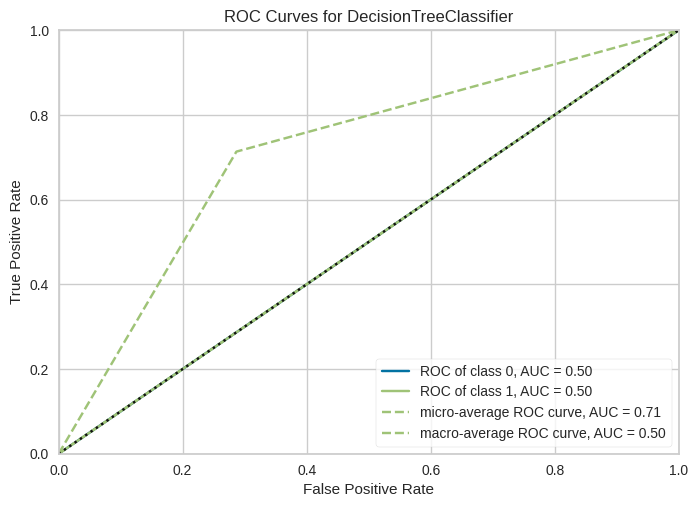

In [39]:
plot_model(best_model, plot="auc")

**METODOLOGIA OPTUNA**

El mejor modelo encontrado con las 100 iteraciones de optuna fue

n_estimators = 431
max_depth = 7
criterion = gini
max_feautures = None

Las lineas que se trazan en el grafico indican como el modelo exploro los estimadores que reportaban recall cercanos 0.7 en cada iteración de esta manera descartando la busqueda en otros rangos, de la misma manera se aprecia un comportamiento similar con 'max_features'.



```
Estos nuevos valores entregan:
                  precision   recall  f1-score   support

           0       0.81      0.89      0.85      1112
           1       0.68      0.53      0.59       486

    accuracy                           0.78      1598
   macro avg       0.75      0.71      0.72      1598
weighted avg       0.77      0.78      0.77      1598

```





Estos valores mejoran RF dejandolo como el modelo LGBM pero debemos considerar que no hemos usado optuna en este último aun

###***6. Interpretabilidad [1.0 puntos]***###

Para analizar la interpretabilidad del LightGBM vamos a usar diferentes técnicas:

6.1) Método Weight, Split y Gain para identificar las features importances

6.2) Valores SHAP

6.3) Individual Dependence Plots

6.4) Partial Dependence Plots

6.5) SHAP Dependence Plot

***6.1) Método Weight, Split y Gain***

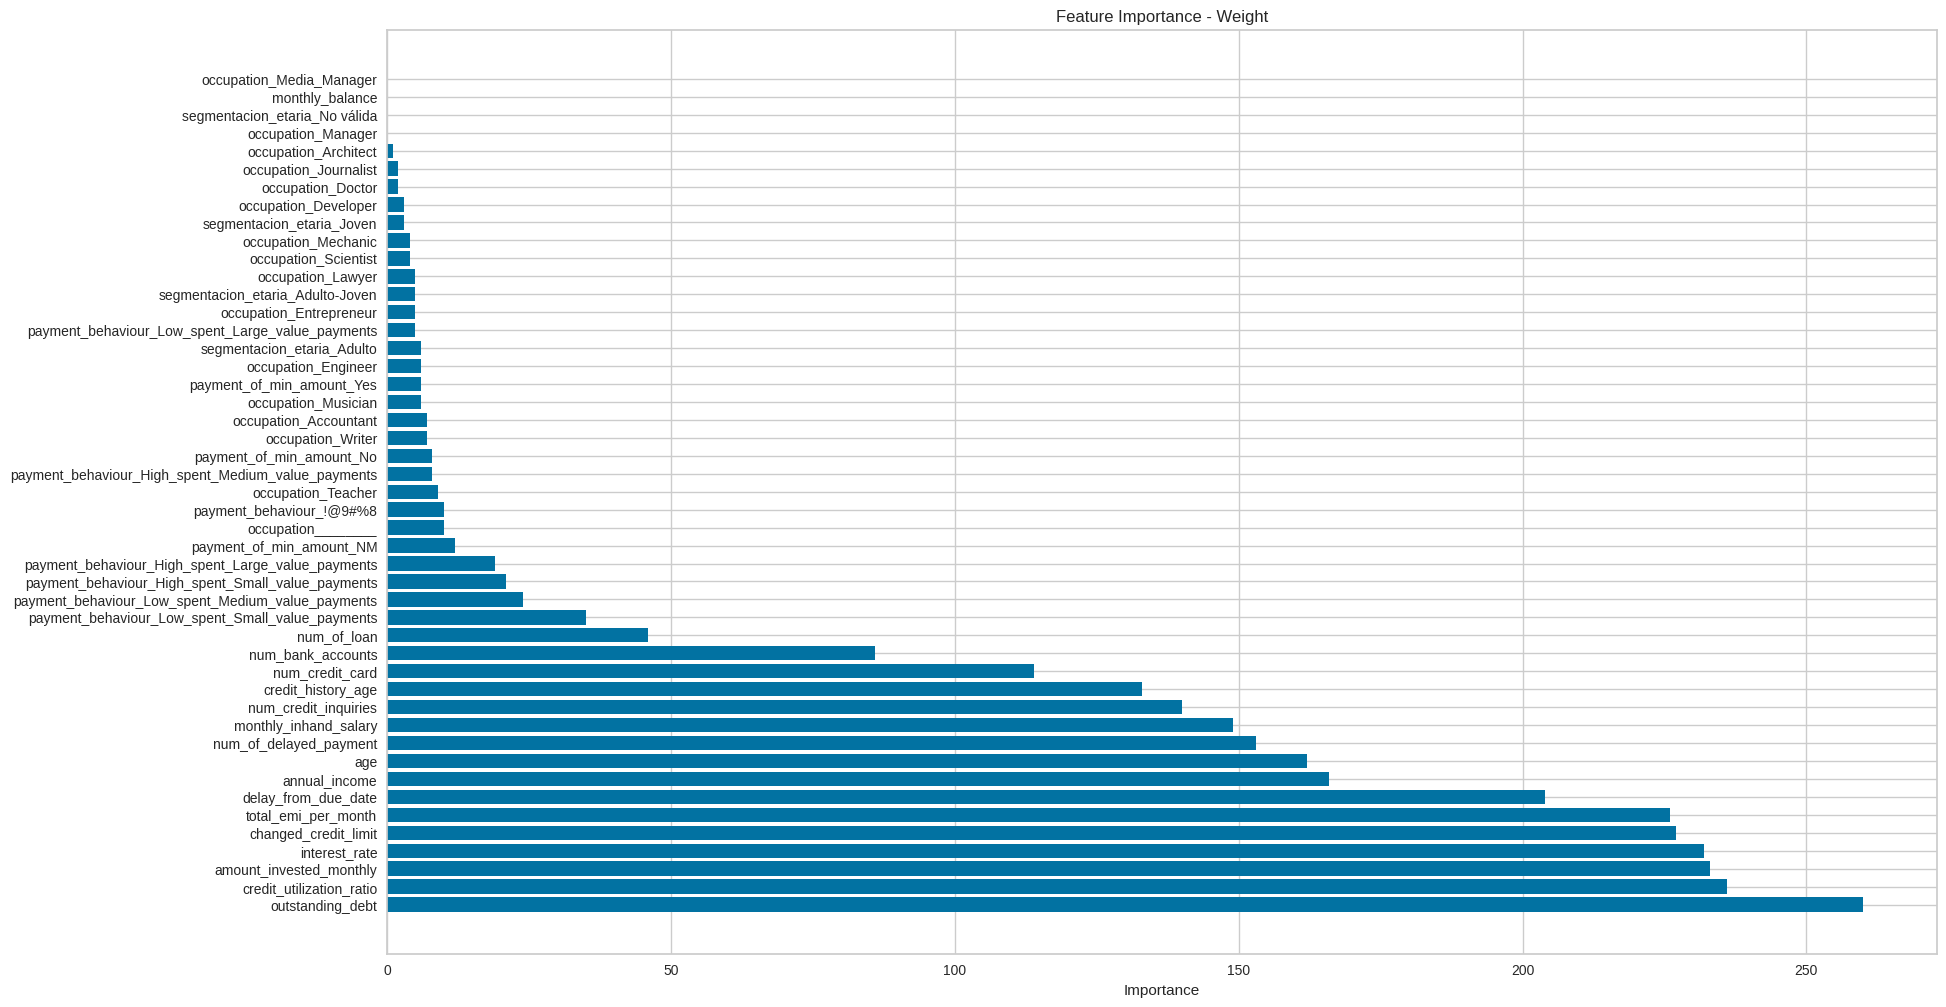

In [40]:
#WEIGHT

import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt

# Calcular la importancia de características utilizando el método "weight"
feature_importance = pipeline_lgbm.named_steps['classifier'].feature_importances_

# Obtener las características reales del preprocesador
features = pipeline_lgbm.named_steps['preprocessor'].get_feature_names_out(input_features=X.columns)

# Crear un DataFrame para almacenar la importancia de cada característica
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

# Ordenar el DataFrame por importancia de mayor a menor
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de características
plt.figure(figsize=(20, 12))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - Weight')
plt.show()



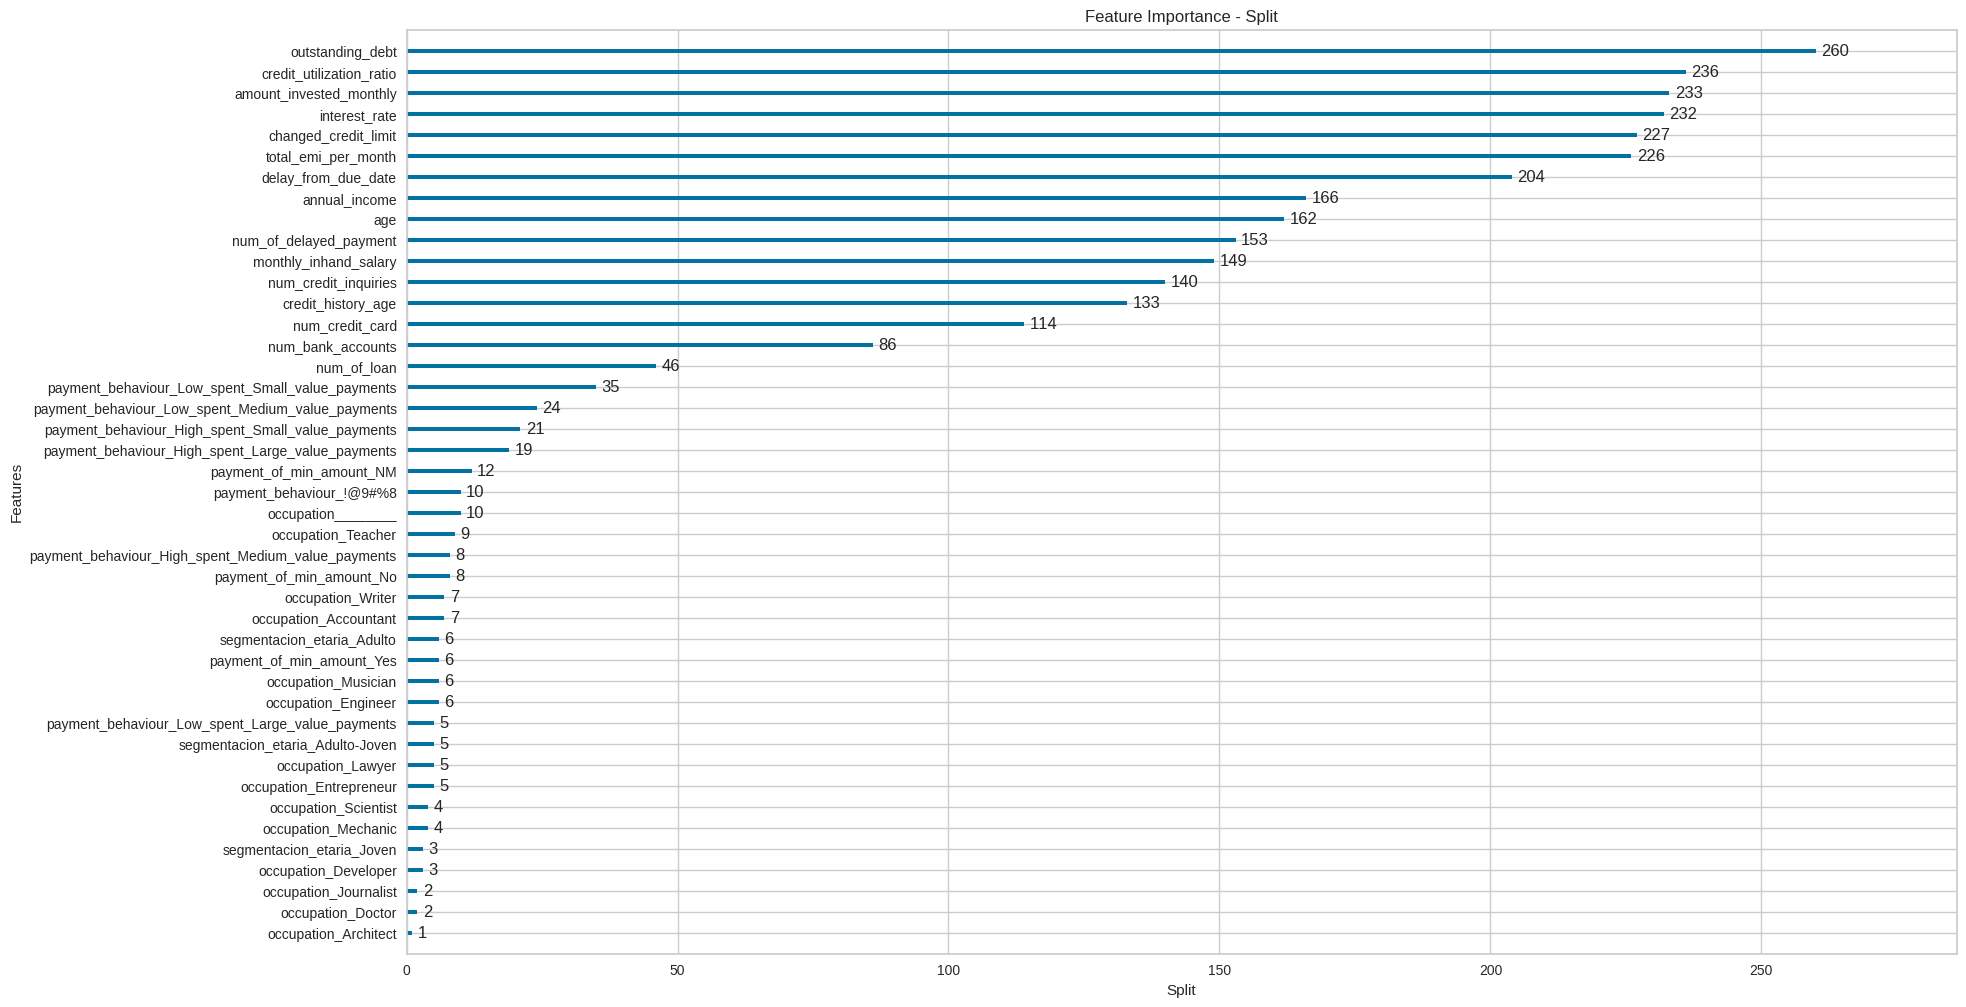

In [41]:
# SPLIT

# Obtener las características reales del preprocesador
features = pipeline_lgbm.named_steps['preprocessor'].get_feature_names_out(input_features=X.columns)

# Visualizar la importancia de características con el método 'split'
lgb.plot_importance(pipeline_lgbm.named_steps['classifier'], importance_type='split', figsize=(20, 12), xlabel='Split')
plt.title('Feature Importance - Split')
plt.show()



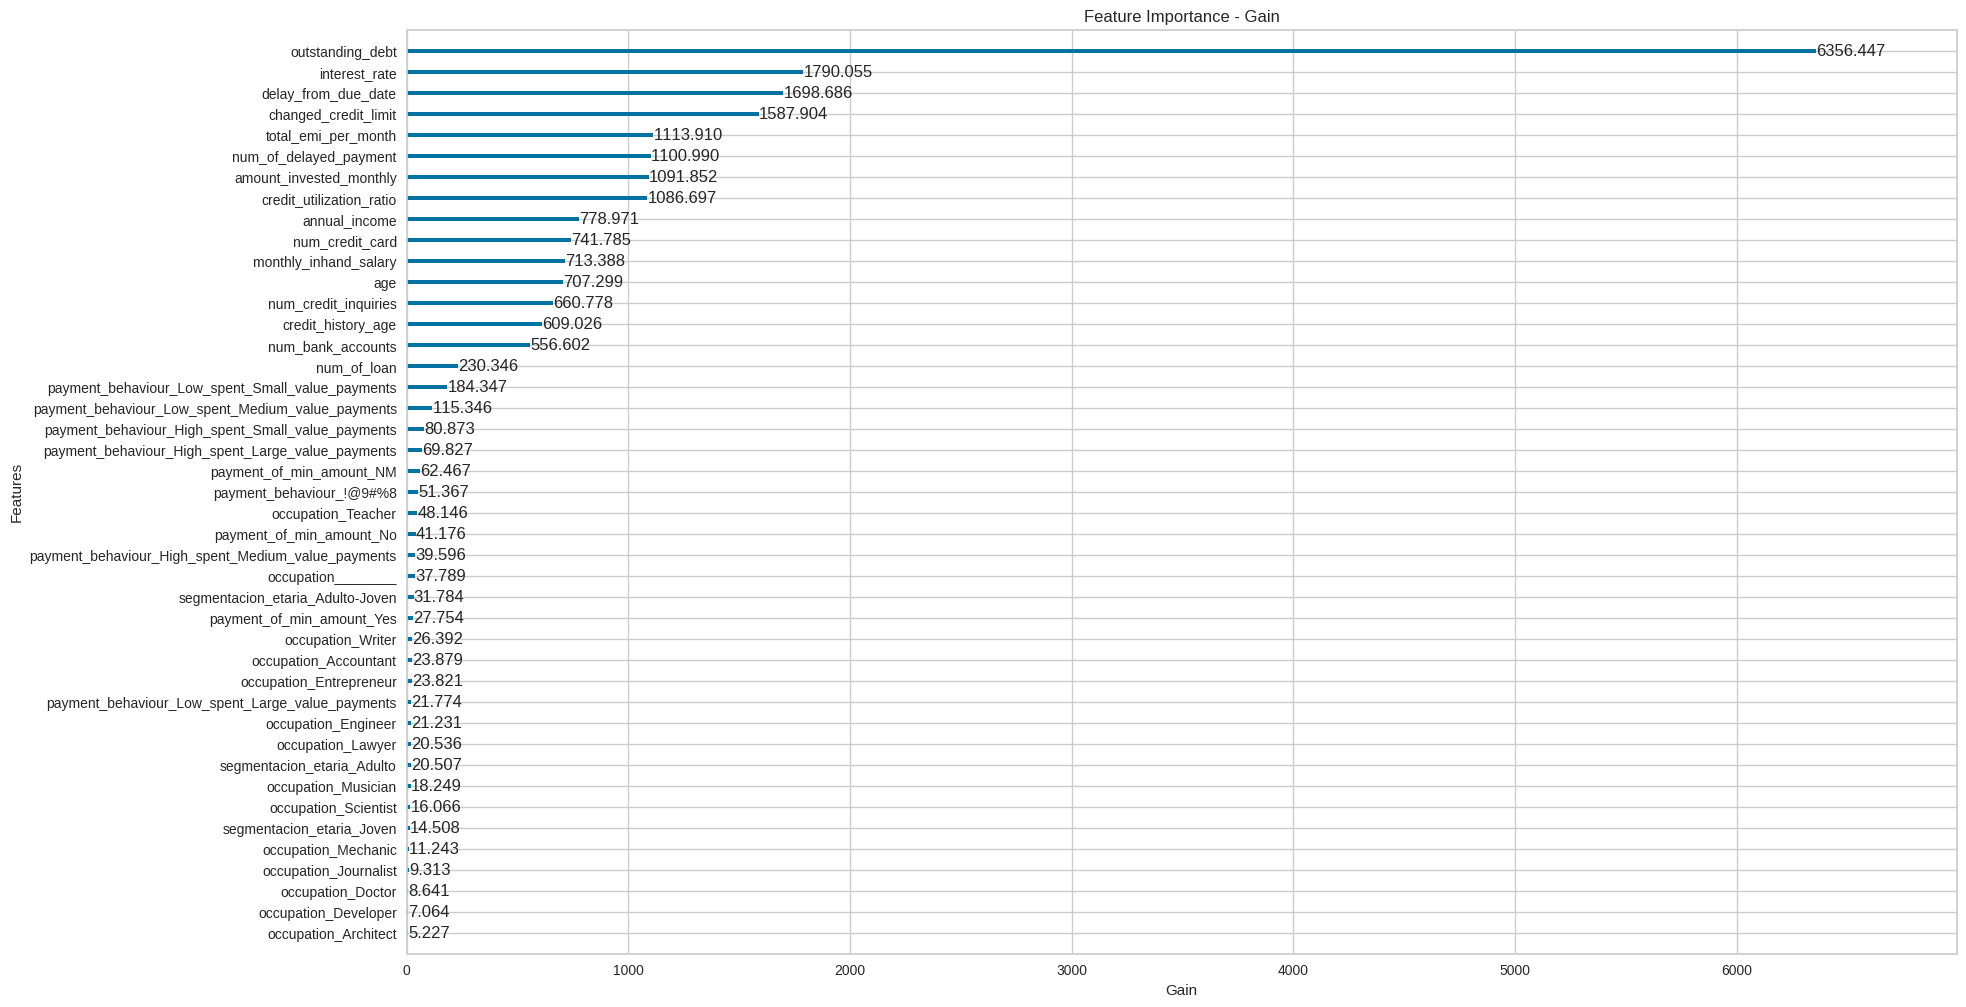

In [42]:
# GAIN

# Visualizar la importancia de características con el método 'gain'
lgb.plot_importance(pipeline_lgbm.named_steps['classifier'], importance_type='gain', figsize=(20, 12), xlabel='Gain')
plt.title('Feature Importance - Gain')
plt.show()

In [43]:
# Obtener las características reales del preprocesador
features = pipeline_lgbm.named_steps['preprocessor'].get_feature_names_out(input_features=X.columns)

# Asignar nombres a las columnas con su número correspondiente
features_with_numbers = [f'{i+1}. {col}' for i, col in enumerate(features)]

features_with_numbers

['1. age',
 '2. annual_income',
 '3. monthly_inhand_salary',
 '4. num_bank_accounts',
 '5. num_credit_card',
 '6. interest_rate',
 '7. num_of_loan',
 '8. delay_from_due_date',
 '9. num_of_delayed_payment',
 '10. changed_credit_limit',
 '11. num_credit_inquiries',
 '12. outstanding_debt',
 '13. credit_utilization_ratio',
 '14. credit_history_age',
 '15. total_emi_per_month',
 '16. amount_invested_monthly',
 '17. monthly_balance',
 '18. occupation_Accountant',
 '19. occupation_Architect',
 '20. occupation_Developer',
 '21. occupation_Doctor',
 '22. occupation_Engineer',
 '23. occupation_Entrepreneur',
 '24. occupation_Journalist',
 '25. occupation_Lawyer',
 '26. occupation_Manager',
 '27. occupation_Mechanic',
 '28. occupation_Media_Manager',
 '29. occupation_Musician',
 '30. occupation_Scientist',
 '31. occupation_Teacher',
 '32. occupation_Writer',
 '33. occupation________',
 '34. payment_of_min_amount_NM',
 '35. payment_of_min_amount_No',
 '36. payment_of_min_amount_Yes',
 '37. segmen

Weight se refiere al número de veces que se utiliza una característica para dividir los datos en todos los árboles. Split representa la ganancia acumulada obtenida por utilizar una característica para realizar divisiones en los árboles. Gain es la contribución promedio de cada característica a la ganancia de información en todos los nodos donde se utiliza dicha característica.

Comparando estos 3 métodos vemos que weight y spolit tienen resultados parecidos, en cambio gain selecciona de manera distinta las features más importantes y entrega distintos valores en órdenes de magnitud de estas con respecto a los 2 métodos anteriores.

Features más importantes con Weight y Split:

1) outstanding_debt

2) credit_utilization_ratio

3) amount_invested_mounthly

4) interest_rate

5) changed_credit_limit

6) total_emi_per_mounth

7) delay_from_due_date

8) annual_income

9) age

10) num_of_delayed_payment

11) monthly_inhand_salary

12) num_credit_inquiries

13) credit_history_age

14) num_credit_card

15) num_bank_accounts


Gain:

1) outstanding_debt

2) interest_rate

3) delay_from_due_date

4) changed_credit_limit

5) total_emi_per_mounth

6) num_of_delayed_payment

7) amount_invested_mounthly

8) credit_utilization_ratio




***6.2) Valores SHAP: Gráfico tipo Bar plot y Gráfico de tipo Beeswarm/Summary Plot***

In [44]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 14.3 MB/s eta 0:00:00


Gráfico tipo Bar plot:

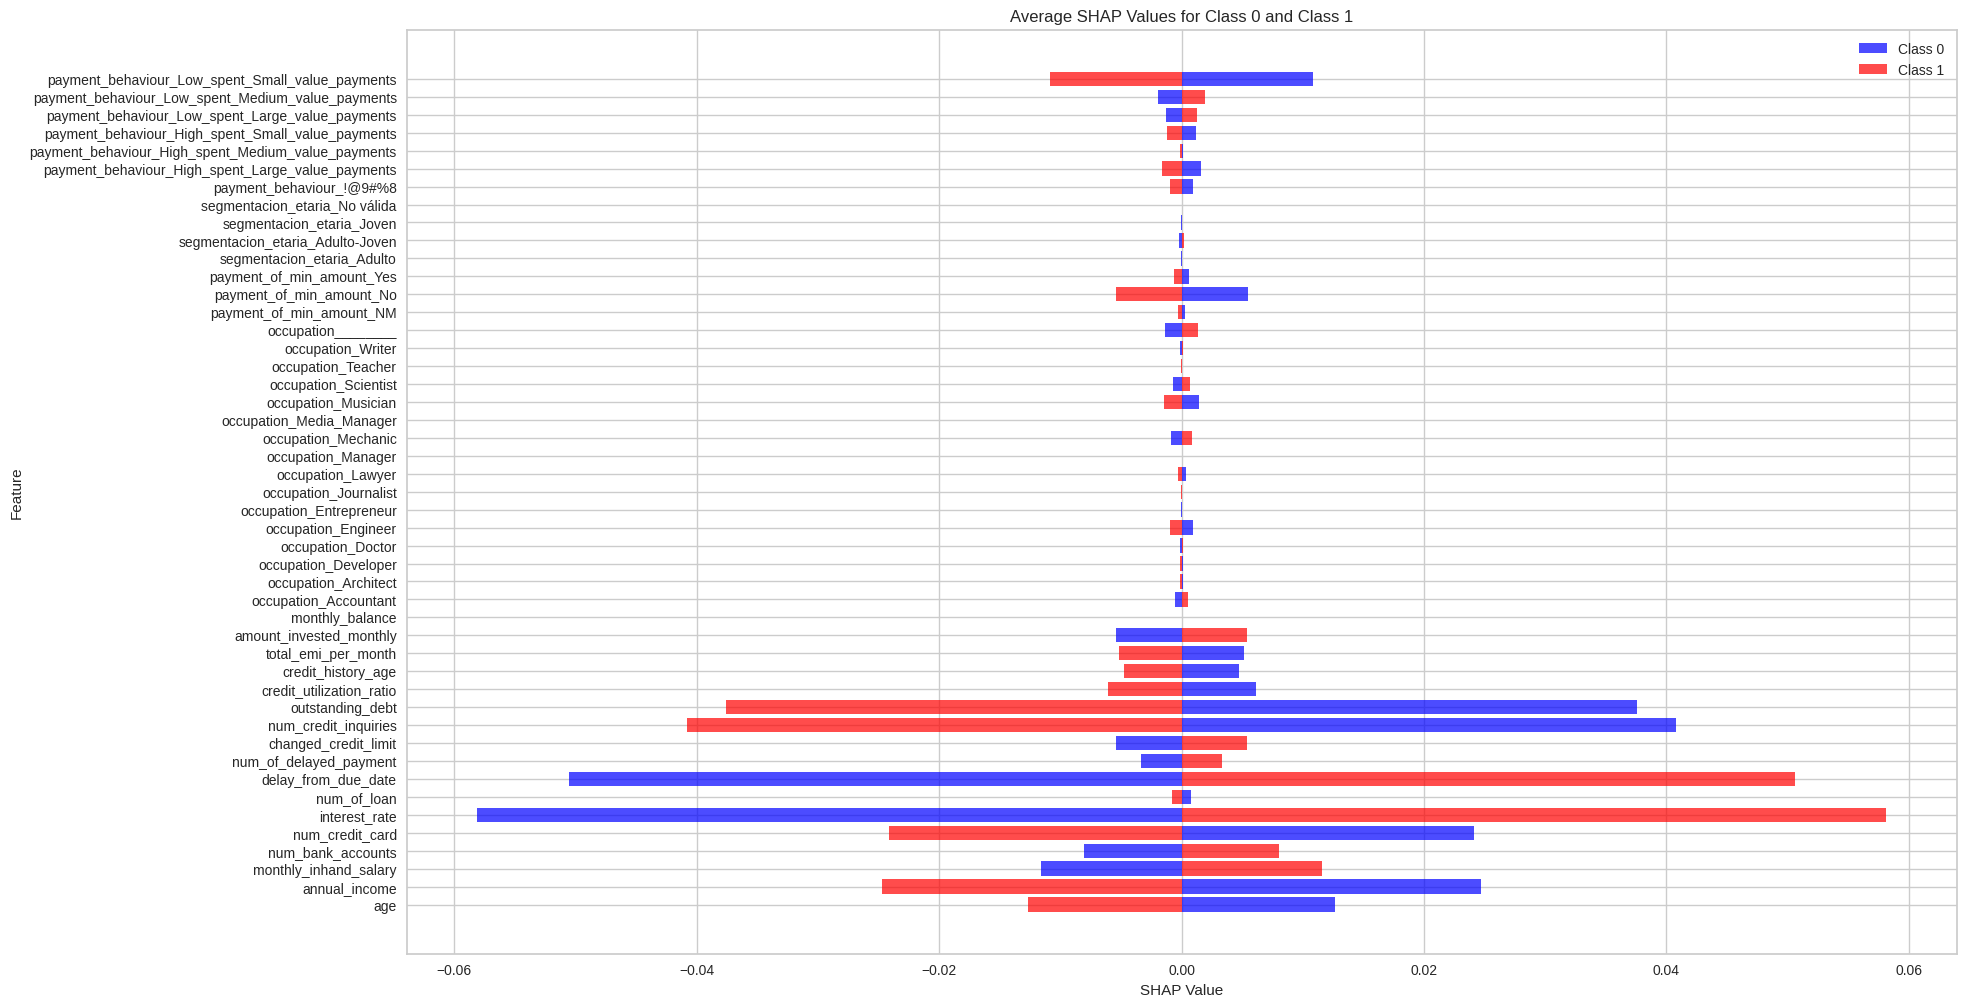

In [45]:
import shap
import pandas as pd
import matplotlib.pyplot as plt

# Obtener las características reales del preprocesador para el conjunto de prueba
features_test = pipeline_lgbm.named_steps['preprocessor'].get_feature_names_out(input_features=X.columns)

# Preprocesar X_test utilizando la pipeline 'preprocessor'
X_test_processed = pipeline_lgbm.named_steps['preprocessor'].transform(X_test)

# Crear el objeto Explainer para el modelo LightGBM
explainer = shap.TreeExplainer(pipeline_lgbm.named_steps['classifier'])

# Calcular los valores SHAP para el conjunto de datos de prueba procesado
shap_values = explainer.shap_values(X_test_processed)

# Convertir X_test_processed a DataFrame de pandas
X_test_processed_df = pd.DataFrame(X_test_processed, columns=features_test)

# Calcular el valor SHAP promedio para cada clase (0 y 1)
shap_values_class0 = shap_values[0]  # Valores SHAP para la clase 0 (clase negativa)
shap_values_class1 = shap_values[1]  # Valores SHAP para la clase 1 (clase positiva)
shap_values_avg_class0 = shap_values_class0.mean(axis=0)  # Valor SHAP promedio para la clase 0
shap_values_avg_class1 = shap_values_class1.mean(axis=0)  # Valor SHAP promedio para la clase 1

# Obtener las características reales del preprocesador para el conjunto de prueba
features_test = pipeline_lgbm.named_steps['preprocessor'].get_feature_names_out(input_features=X.columns)

# Crear un DataFrame para almacenar los valores SHAP promedio de cada clase
shap_df = pd.DataFrame({
    'Feature': features_test,
    'SHAP Value (Class 0)': shap_values_avg_class0,
    'SHAP Value (Class 1)': shap_values_avg_class1
})

# Graficar el gráfico de barras para los valores SHAP promedio de cada clase
plt.figure(figsize=(20, 12))
plt.barh(shap_df['Feature'], shap_df['SHAP Value (Class 0)'], color='blue', alpha=0.7, label='Class 0')
plt.barh(shap_df['Feature'], shap_df['SHAP Value (Class 1)'], color='red', alpha=0.7, label='Class 1')
plt.xlabel('SHAP Value')
plt.ylabel('Feature')
plt.title('Average SHAP Values for Class 0 and Class 1')
plt.legend()
plt.show()


En el gráfico Bar plot de valores SHAP, podemos interpretar la importancia relativa de las características en las predicciones del modelo para las clases 0 y 1 (clase negativa y clase positiva, respectivamente).

La barra azul muestra el valor SHAP promedio para la clase 0 (clase negativa), y la barra roja muestra el valor SHAP promedio para la clase 1 (clase positiva).

Las características "num_credit_inquiries", "outstanding_debt", "num_credit_card" y "total_emi_per_month" tienen un mayor valor SHAP en la clase 1 (rojo), lo que indica que estas características tienen un impacto significativo en aumentar la probabilidad de pertenecer a la clase positiva (clase 1). La variable "total_emi_per_month" tiene un mayor valor SHAP en la clase 0 (azul).

Por otro lado, las características que tienen un valor SHAP promedio cercano a cero en ambas clases (o cercano a cero en la clase 1 y un valor negativo en la clase 0) tienen un impacto menor o nulo en la predicción del modelo.

Gráfico de tipo Beeswarm/Summary Plot:

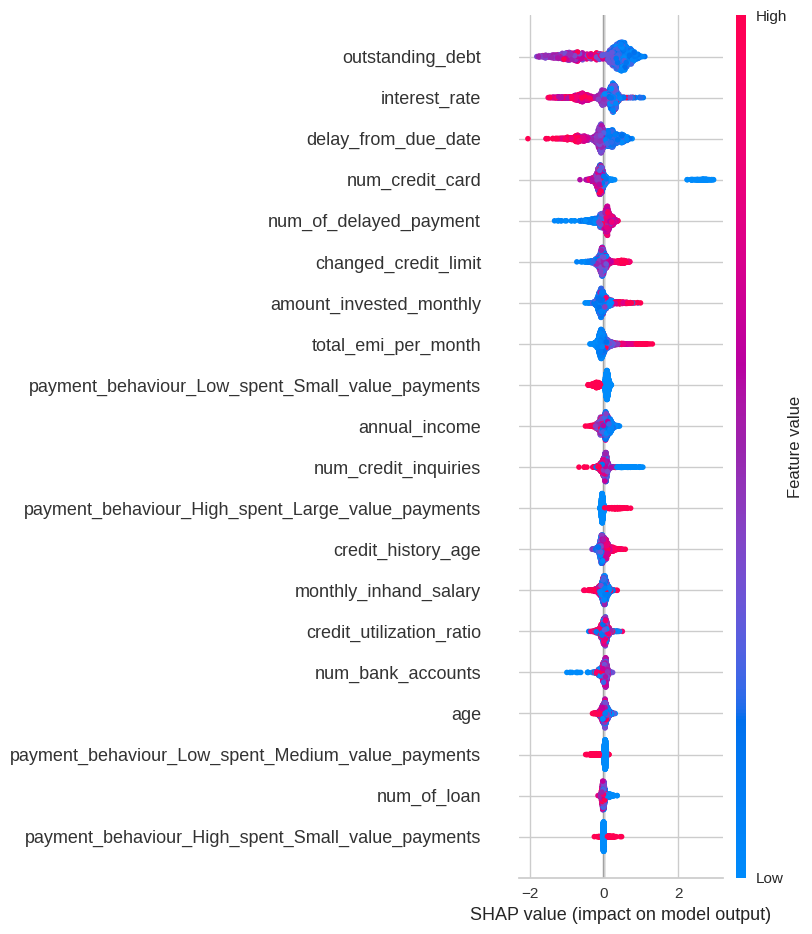

In [46]:
import shap
import pandas as pd
import matplotlib.pyplot as plt

# Obtener las características reales del preprocesador para el conjunto de prueba
features_test = pipeline_lgbm.named_steps['preprocessor'].get_feature_names_out(input_features=X.columns)

# Crear el objeto Explainer para el modelo LightGBM
explainer = shap.TreeExplainer(pipeline_lgbm.named_steps['classifier'])

# Preprocesar X_test utilizando la pipeline 'preprocessor'
X_test_processed = pipeline_lgbm.named_steps['preprocessor'].transform(X_test)

# Convertir X_test_processed a DataFrame de pandas
X_test_processed_df = pd.DataFrame(X_test_processed, columns=features_test)

# Calcular los valores SHAP para el conjunto de datos de prueba procesado
shap_values = explainer.shap_values(X_test_processed)

# Convertir X_test_processed a DataFrame de pandas
X_test_processed_df = pd.DataFrame(X_test_processed, columns=features_test)

# Crear el gráfico de tipo Beeswarm/Summary Plot
shap.summary_plot(shap_values[0], X_test_processed_df)  # Considerando solo el primer modelo si es multi-output

plt.show()



1) El eje horizontal se extiende desde los valores SHAP más negativos a los más positivos. Los puntos más a la izquierda representan instancias con una contribución negativa a la predicción, mientras que los puntos más a la derecha tienen una contribución positiva.

2) Las barras horizontales indican la distribución de los valores SHAP para cada característica. La longitud de la barra representa la magnitud de los valores SHAP y el color indica el valor de la característica correspondiente para cada instancia. Por ejemplo, los valores altos de la característica se pueden representar en rojo y los valores bajos en azul.
Este gráfico permite identificar las características que tienen una mayor influencia en las predicciones del modelo. Las características que tienen una mayor dispersión de valores SHAP y barras más largas son las que tienen un mayor impacto en las predicciones.

Para la característica "outstanding_debt", podemos observar que los puntos se encuentran principalmente hacia la izquierda, lo que indica que los valores bajos de deuda pendiente tienden a tener un impacto negativo en las predicciones del modelo (clase 0). Mientras que los valores más altos de deuda pendiente tienden a tener un impacto positivo en las predicciones (clase 1).

Para la característica "interest_rate", los puntos se encuentran distribuidos hacia la izquierda, lo que indica que los valores más bajos de tasa de interés tienden a tener un impacto negativo en las predicciones (clase 0). Mientras que los valores más altos de tasa de interés tienden a tener un impacto positivo en las predicciones (clase 1).

Para la característica "delay_from_due_date", los puntos se encuentran principalmente hacia la izquierda, lo que indica que los valores bajos de retraso desde la fecha de vencimiento tienden a tener un impacto negativo en las predicciones (clase 0). Mientras que los valores más altos de retraso tienden a tener un impacto positivo en las predicciones (clase 1).

Para la característica "num_credit_card", los puntos se distribuyen hacia la derecha, lo que indica que los valores más altos del número de tarjetas de crédito tienden a tener un impacto positivo en las predicciones (clase 1). Mientras que los valores más bajos del número de tarjetas de crédito tienden a tener un impacto negativo en las predicciones (clase 0).

Para la característica "num_of_delayed_payment", los puntos se encuentran distribuidos hacia la izquierda, lo que indica que los valores más bajos del número de pagos atrasados tienden a tener un impacto negativo en las predicciones (clase 0). Mientras que los valores más altos del número de pagos atrasados tienden a tener un impacto positivo en las predicciones (clase 1).


***6.3) Individual Dependence Plots para las cuatro características más importantes para 10 observaciones aleatorias del conjunto de prueba***

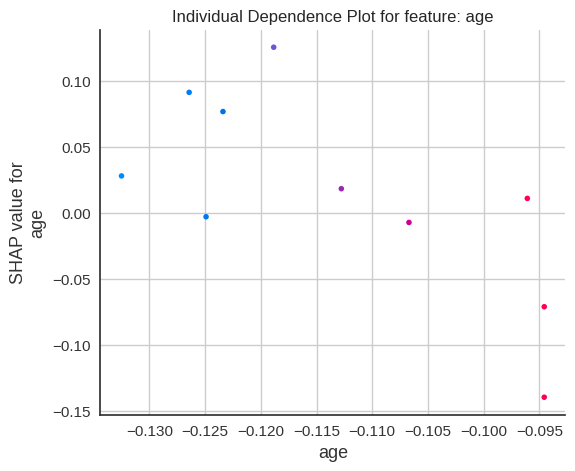

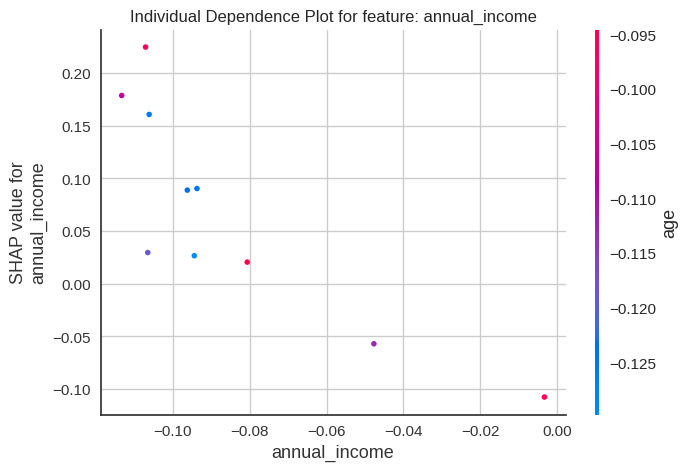

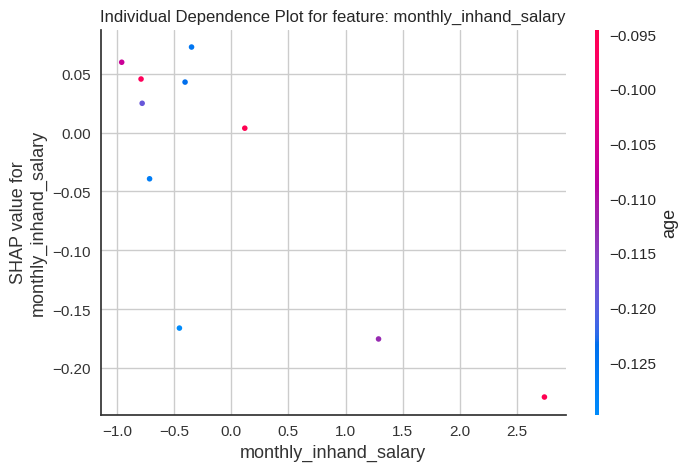

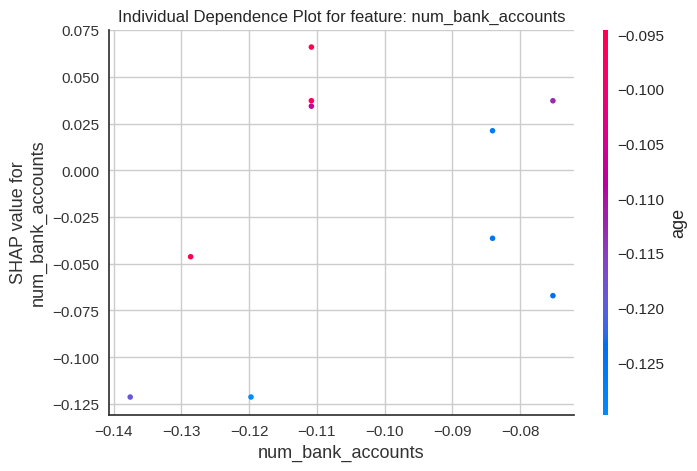

In [47]:
import random

# Elegir 10 observaciones aleatorias del conjunto de prueba
num_observations_to_plot = 10
random_indices = random.sample(range(X_test_processed_df.shape[0]), num_observations_to_plot)
X_random = X_test_processed_df.iloc[random_indices, :]

# Calcular los valores SHAP para las observaciones aleatorias seleccionadas
shap_values_random = explainer.shap_values(X_random)

# Analizar las interacciones utilizando dependence_plot para las cuatro características más importantes
for idx in range(4):
    feature_name = features_test[idx]
    shap.dependence_plot(feature_name, shap_values_random[0], X_random, show=False)
    plt.title(f'Individual Dependence Plot for feature: {feature_name}')
    plt.show()


El gráfico de tipo Beeswarm/Summary Plot muestra los valores SHAP para cada característica del conjunto de prueba. Cada punto representa una instancia de datos y su posición horizontal indica el valor SHAP correspondiente para esa característica en esa instancia específica.

Para la característica "outstanding_debt", podemos observar que los puntos se encuentran principalmente hacia la izquierda, lo que indica que los valores bajos de deuda pendiente tienden a tener un impacto negativo en las predicciones del modelo (clase 0). Mientras que los valores más altos de deuda pendiente tienden a tener un impacto positivo en las predicciones (clase 1).

Para la característica "interest_rate", los puntos se encuentran distribuidos hacia la izquierda, lo que indica que los valores más bajos de tasa de interés tienden a tener un impacto negativo en las predicciones (clase 0). Mientras que los valores más altos de tasa de interés tienden a tener un impacto positivo en las predicciones (clase 1).

Para la característica "delay_from_due_date", los puntos se encuentran principalmente hacia la izquierda, lo que indica que los valores bajos de retraso desde la fecha de vencimiento tienden a tener un impacto negativo en las predicciones (clase 0). Mientras que los valores más altos de retraso tienden a tener un impacto positivo en las predicciones (clase 1).

Para la característica "num_credit_card", los puntos se distribuyen hacia la derecha, lo que indica que los valores más altos del número de tarjetas de crédito tienden a tener un impacto positivo en las predicciones (clase 1). Mientras que los valores más bajos del número de tarjetas de crédito tienden a tener un impacto negativo en las predicciones (clase 0).

Para la característica "num_of_delayed_payment", los puntos se encuentran distribuidos hacia la izquierda, lo que indica que los valores más bajos del número de pagos atrasados tienden a tener un impacto negativo en las predicciones (clase 0). Mientras que los valores más altos del número de pagos atrasados tienden a tener un impacto positivo en las predicciones (clase 1).

***6.4) Partial Dependence Plot para visualizar las interacciones entre las cuatro características más importantes y los valores SHAP para la clase positiva (clase 1) del modelo LightGBM.***

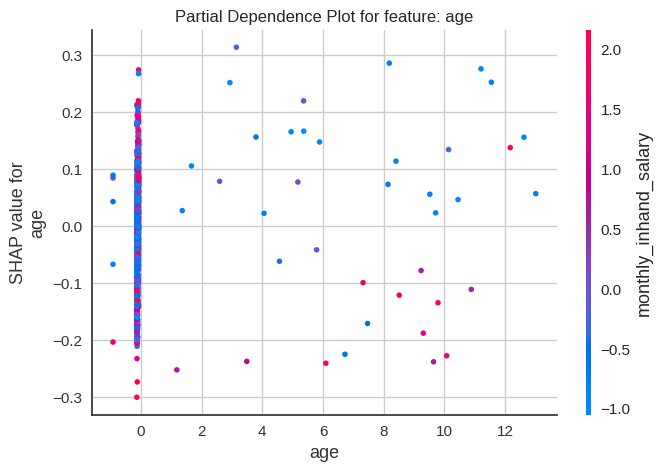

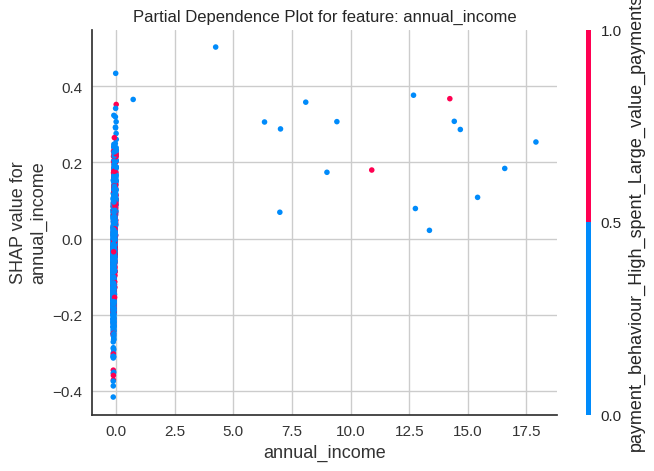

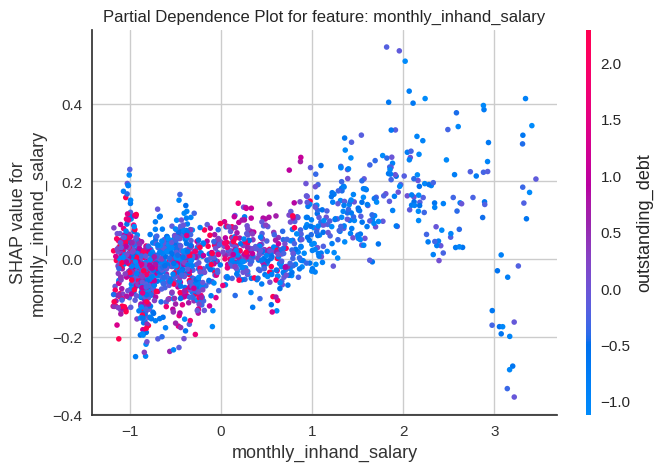

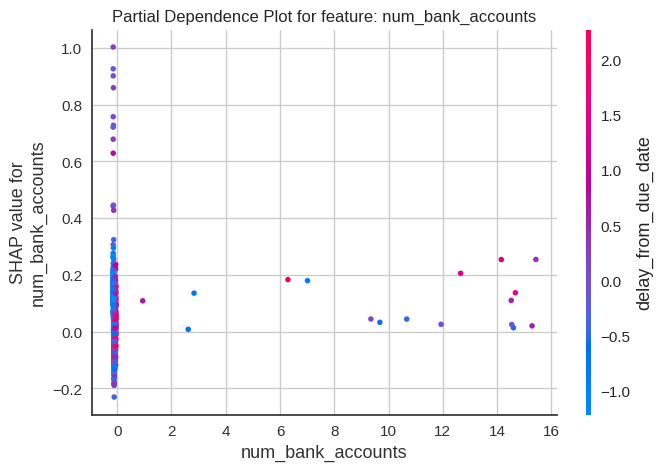

In [48]:
import shap
import pandas as pd
import matplotlib.pyplot as plt

# Obtener las características reales del preprocesador para el conjunto de prueba
features_test = pipeline_lgbm.named_steps['preprocessor'].get_feature_names_out(input_features=X.columns)

# Crear el objeto Explainer para el modelo LightGBM
explainer = shap.TreeExplainer(pipeline_lgbm.named_steps['classifier'])

# Calcular los valores SHAP para el conjunto de datos de prueba procesado
shap_values_class1 = shap_values[1]  # Valores SHAP para la clase 1 (clase positiva)

# Visualizar los Partial Dependence Plots para las cuatro características más importantes
for idx in range(4):
    feature_name = features_test[idx]
    shap.dependence_plot(feature_name, shap_values_class1, X_test_processed_df, show=False)
    plt.title(f'Partial Dependence Plot for feature: {feature_name}')
    plt.show()


Los gráficos de Partial Dependence Plots (PDP) muestran cómo una característica específica afecta a las predicciones del modelo cuando se varía independientemente de las otras características. En este caso, se están analizando las características "age", "annual_income", "monthly_inhand_salary" y "num_banck_accounts".

"age": afecta las predicciones del modelo. A mayor de age, se es menos propenso a caer en la clase 0.

"annual_income": afecta las predicciones del modelo. A mayores ingresos anuales, se es menos propenso a caer en la clase 0.

"monthly_inhand_salary": afecta las predicciones del modelo. A mayor de monthly_inhand_salary, se es menos propenso a caer en la clase 0.

"num_banck_accounts": afecta las predicciones del modelo. A mayor de num_banck_accounts, se es más propenso a caer en la clase 1.


***6.5) SHAP Dependence Plot para las cuatro características más importantes***

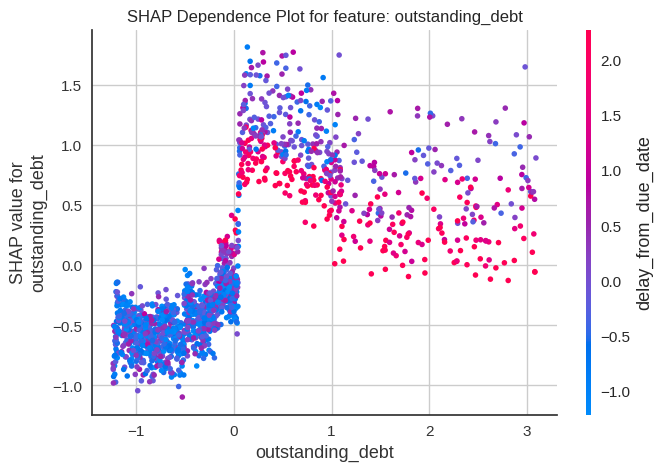

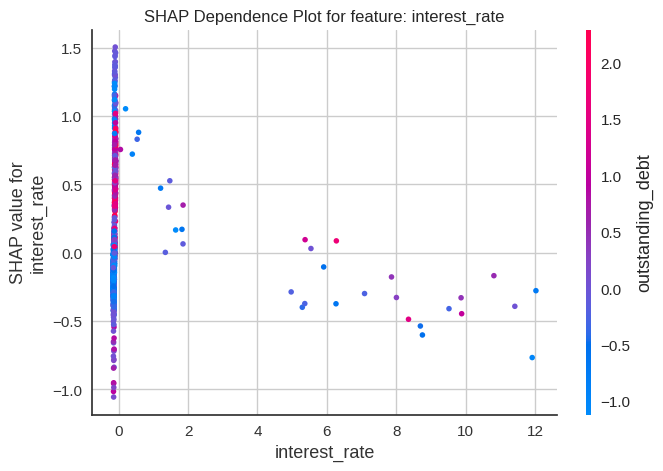

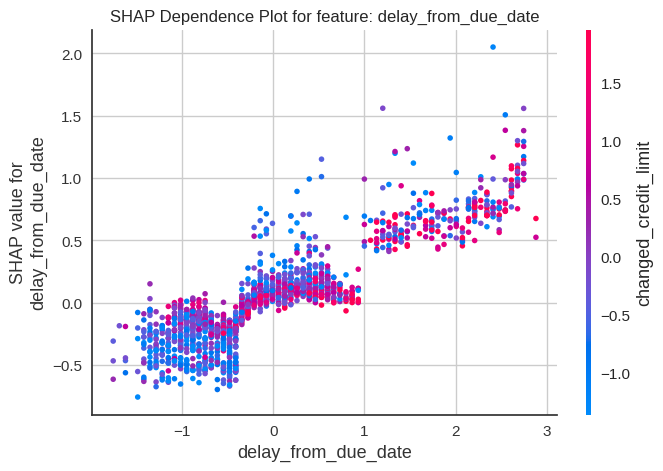

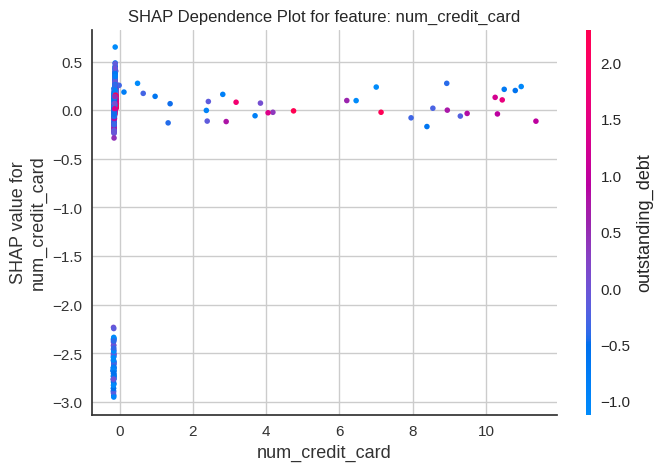

In [51]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Obtener las características reales del preprocesador para el conjunto de prueba
features_test = pipeline_lgbm.named_steps['preprocessor'].get_feature_names_out(input_features=X.columns)

# Crear el objeto Explainer para el modelo LightGBM
explainer = shap.TreeExplainer(pipeline_lgbm.named_steps['classifier'])

# Calcular los valores SHAP para la clase 1 (clase positiva)
shap_values_class1 = shap_values[1]

# Obtener los valores absolutos de los valores SHAP para calcular las importancias
abs_shap_values_class1 = np.abs(shap_values_class1)

# Obtener las índices de las cuatro características más importantes
top_4_features_indices = abs_shap_values_class1.mean(axis=0).argsort()[-4:][::-1]

# Obtener los nombres de las cuatro características más importantes
top_4_features_names = [features_test[i] for i in top_4_features_indices]

# Graficar el SHAP Dependence Plot para las cuatro características más importantes
for feature_name in top_4_features_names:
    shap.dependence_plot(feature_name, shap_values_class1, X_test_processed_df, show=False)
    plt.title(f'SHAP Dependence Plot for feature: {feature_name}')
    plt.show()


SHAP Dependence Plot nos proporciona información detallada sobre cómo cada una de las características más importantes influye en las predicciones del modelo para la clase positiva. Nos ayudan a entender mejor cómo se toman las decisiones basadas en diferentes valores de características y cuál es el impacto de cada característica en la probabilidad de pertenecer a la clase positiva.

outstanding_debt: afecta las predicciones del modelo. A mayor de age, se es menos más a caer en la clase 1.

interest_rate: afecta las predicciones del modelo. A menor de age, se es menos más a caer en la clase 1.

delay_from_due_date: afecta las predicciones del modelo. A mayor de age, se es menos más a caer en la clase 1.

num_credit_card: afecta las predicciones del modelo. A menor de age, se es menos más a caer en la clase 1.

Es curioso cómo con unos metódos se tiene un set de variables importantes para la predicción y con otras maniobras, este set cambia.

¿Existen variables irrelevantes en el problema modelado?, ¿Cuales son?

***Respuesta:***

Las ocupaciones de las personas y la segmentacion etaria realizada fue lo que menor impacto mostro en el grafico de SHAP valio de clase 0 vs clase 1. Por lo que podriamos decir que estas variables no son relevantes por si solas.

###***7. Concluir [1.0 puntos]***###

En lo visto en este proyecto se pudo apreciar la utilazacion de diferentes modelos de ML para poder establecer un modelo base o baseline en diferentes problemas que se nos puedan presentar a futuro. apartir de este modelo base que debe ser mejor que un modelo Dummy sino no tendria sentido utilizarlo como base.

En el caso de este proyecto utilizamos un modelo RandomForest y otro LGBM, los cuales presentaron mejores metricas para RECALL lo cual nos interesa al estar analizando una problema que se parece al problema del dataset de clasificar pacientes con cancér.

La mejor metrica que logro obtener entre la metodologia del uso de una grilla de busqueda como GridSearchCV y Optuna fue de 0.53 de Recall para la clase 1 de interes.
Por lo que se puede decir que el problema fue resuelto pero los resultados obtenido no son aceptables hasta el momento. Aun considerando clases desbalanceados en pycaret o utilizando F1 justificando por desbalance, no se logra algo satisfactorio.

El EDA permite identificar desbalances, datos mal etiquetados, datos correlacionados positiva o negativamente, distribuciones, tipos de variables, valores atípicos y cualquier otro patrón presente. Esto es crucial para tomar decisiones informadas sobre qué técnicas de modelado son más apropiadas.

Respecto  al modelo RF de base, los resultados fueron los siguientes:

```
Metrics for Random Forest:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1112
           1       0.69      0.48      0.56       486

    accuracy                           0.77      1598
   macro avg       0.74      0.69      0.71      1598
weighted avg       0.76      0.77      0.76      1598

```
Lo cual en la mejor optimizacion que se logro se obtuvo:

```
Metrics Random Forest Optuna:
                  precision   recall  f1-score   support

           0       0.81      0.89      0.85      1112
           1       0.68      0.53      0.59       486

    accuracy                           0.78      1598
   macro avg       0.75      0.71      0.72      1598
weighted avg       0.77      0.78      0.77      1598



```

No estamos conformes con los resultados obtenidos la metrica de interes sigue siendo muy baja y dado que ningun metodo de hiperparametros logro satisfactoriamente aumentar esta. Determinamos que fallo nuestro preprocesamineto de datos, este debe ser más complejo y aplicar todo el analisis realizado en mayor profundidad, adaptando los resultados en diferentes pipelines.
Aunque algo que se reviso en poco profundidad fue el desbalance de clases, solo se vio una linea de codigo de esto en ek bonus de la parte 5 donde se obtuvo un recall de 0.75 con UnbalancedRandomForestClassifier.


Se aprendio a comparar diferentes modelos de ML para un mismo problema, sobre herramientas de autoML, la libreria de Optuna la encontramos interesantes y pensamos utilizar en futuros proyectos o trabajos.
Respecto aprendizajes que nos quedan pendientes, es la implementación de kedro pero de un codigo ya generado en jupyter, sabes por el lab 11 como montar kedro y formar un preprocesamiento, pero no logramos entender como montar un columnTranformer dentro de los pipelines de kedro.

